In [1]:
import time
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random

In [2]:
time_sleep = 0.5

In [3]:
# Function to check if we have a counter-clockwise turn
def is_counter_clockwise(p1, p2, p3):
  
    return (p3[1] - p1[1]) * (p2[0] - p1[0]) >= (p2[1] - p1[1]) * (p3[0] - p1[0])

# Function to update the plot by highlighting current hull points
def update_plot(fig, ax, current_hull):

    """Function to update the plot by highlighting current hull points

    Args:
        ax: point object
        canvas: canvas object / where the plot is drawn
        current_hull: current hull points

    Returns:
        ax: point object (scatter plot of current hull points)
        canvas: canvas object / where the plot is drawn
    """
    
    # Scatter plot of current hull points
    ax.scatter([x[0] for x in current_hull], [y[1] for y in current_hull], c='r', marker='o', label='Highlighted Points')
    
    # Plot dashed lines connecting current hull points
    ax.plot(current_hull[:, 0], current_hull[:, 1], 'k--', picker=5, linewidth=1)
    
    display(fig)
    clear_output(wait=True)

    time.sleep(time_sleep)

    return ax

# Function to add the last connection to the convex hull
def last_connection(fig, ax, convex_hull_points):

    # Plot dashed line connecting the last and first points in the convex hull
    ax.plot([convex_hull_points[-1, 0], convex_hull_points[0, 0]], [convex_hull_points[-1, 1], convex_hull_points[0, 1]], 'k--', picker=5, linewidth=1)
    
    time.sleep(time_sleep)
    
    display(fig)
    clear_output(wait=True)

    return ax

# Function to finalize and plot the convex hull
def final_hull(fig, ax, convex_hull_points):
    
    # Plot the final convex hull in red
    ax.plot(convex_hull_points[:, 0], convex_hull_points[:, 1], 'r-', picker=5, linewidth=2)
    
    # Plot the connection between the last and first points
    ax.plot([convex_hull_points[-1, 0], convex_hull_points[0, 0]], [convex_hull_points[-1, 1], convex_hull_points[0, 1]], 'r-', picker=5, linewidth=2)
    
    # Scatter plot of final convex hull points
    ax.scatter([x[0] for x in convex_hull_points], [y[1] for y in convex_hull_points], c='r', marker='o', label='Highlighted Points')


def show_initial_plot(fig, ax, points):

    ax.scatter([x[0] for x in points], [y[1] for y in points], c='b', marker='o', label='Points', s=4)  # Plot points

    display(fig)
    clear_output(wait=True)

    time.sleep(time_sleep)
    
    return ax

def draw_point_line(fig, ax, current_hull_point, point):

    # Plot the connection between the last and first points
    new_line = ax.plot([current_hull_point[0], point[0]], [current_hull_point[1], point[1]], color = (255 / 255, 192 / 255, 128 / 255), linestyle = '--', picker=5, linewidth=1)

    display(fig)
    clear_output(wait=True)

    time.sleep(time_sleep)
    
    return ax, new_line


def draw_next_endpoint(fig, ax, next_endpoint):

    ax.scatter(next_endpoint[0], next_endpoint[1], c='green', marker='o', label='Points')  # Plot points

    display(fig)
    clear_output(wait=True)

    time.sleep(time_sleep)
    
    return ax
    

# Main function to calculate the convex hull using the Gift Wrapping algorithm
def gift_warpping_2(fig, ax, points):
        
    points = np.array(points)
    
    current_hull_point = points[np.argmin(points[:, 0])]
    convex_hull_points = []

    ax = show_initial_plot(fig, ax, points)
    
    while True:
    
        convex_hull_points.append(current_hull_point)
        next_endpoint = points[0]

        # Create a list to store the lines
        temporary_lines = []
   
        for current_point in points:

            ax, new_line = draw_point_line(fig, ax, current_hull_point, current_point)

            temporary_lines.append(new_line[0])  # Add the new line to the list of lines
    
            if (next_endpoint[0] == current_hull_point[0] and next_endpoint[1] == current_hull_point[1]) or not is_counter_clockwise(current_point, current_hull_point, next_endpoint):
    
                next_endpoint = current_point


        current_hull_point = next_endpoint

        ax = update_plot(fig, ax, np.array(convex_hull_points))
        ax = draw_next_endpoint(fig, ax, next_endpoint)

        # Remove the temporary lines
        for temporary_line in temporary_lines:
    
            temporary_line.remove()

        if current_hull_point[0] == convex_hull_points[0][0] and current_hull_point[1] == convex_hull_points[0][1]:
        
            temporary_lines = []
            
            for current_point in points:

                ax, new_line = draw_point_line(fig, ax, current_hull_point, current_point)
                temporary_lines.append(new_line[0])  # Add the new line to the list of lines

            # Remove the temporary lines
            for temporary_line in temporary_lines:
        
                temporary_line.remove()    

            break
    
        
    convex_hull_points = np.array(convex_hull_points)
    ax = last_connection(fig, ax, convex_hull_points)


    time.sleep(time_sleep)
    
    final_hull(fig, ax, convex_hull_points)
    
    # return convex_hull_points

In [4]:
# Create an empty list to store the points
points = []

random.seed(1)
# Generate and store 10 random points
for _ in range(5):
    x = random.uniform(0, 15)
    y = random.uniform(0, 15)
    points.append((x, y))

# Print the array of points
for point in points:
    print(point)

(2.0154636616860184, 12.71150605405849)
(11.45661928464921, 3.826035386091325)
(7.431526306379114, 6.742365971831072)
(9.773894590841444, 11.830850267032698)
(1.4078938016135234, 0.42521214783009464)


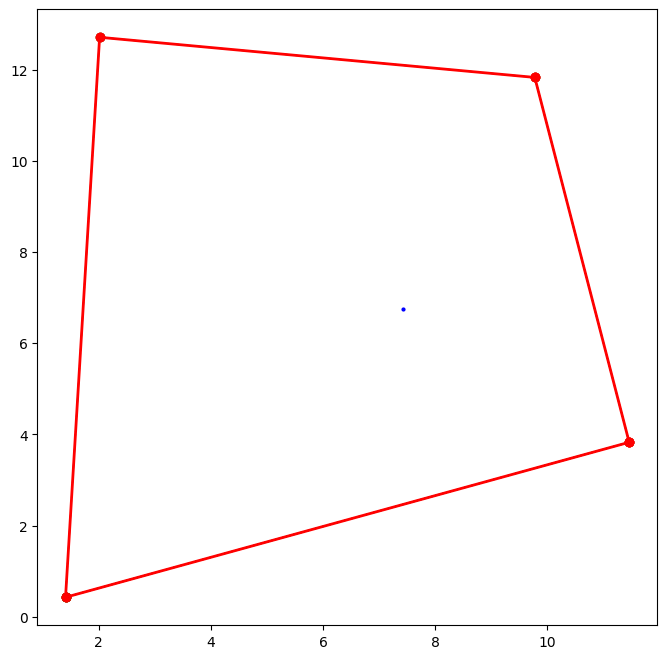

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

gift_warpping_2(fig, ax, points)

# https://www.youtube.com/watch?v=vPDPE66nhlo